# Project data exploration - looking at relplot and scatter
Using a dataset that your group is consider using for the term project, let's do some data exploring of the different features in your dataset and their relationships

Group name:  Group 13
Created by Kaulan Serzhanuly, Shruthi Raghavan, Haitham Assaf (018226910, 017558515 , 018221008)  
Last updated: 10/11/2025  
Briefly describe your dataset
# Brief Description:
# This dataset contains synthetic video game sales and streaming analytics data.
# It includes comprehensive game information, sales metrics, critic/user scores,
# and Twitch streaming statistics for 2,500 games across multiple platforms and genres.

Import your data. If you want to mount your Google drive you can use `from google.colab import drive` and `drive.mount('/content/drive')`

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet

# Set plotting style
try:
    xbox_df = pd.read_csv('XboxOne_GameSales.csv', encoding='utf-8')
    print("Xbox dataset loaded with UTF-8 encoding")
except UnicodeDecodeError:
    try:
        xbox_df = pd.read_csv('XboxOne_GameSales.csv', encoding='latin-1')
        print("Xbox dataset loaded with Latin-1 encoding")
    except:
        xbox_df = pd.read_csv('XboxOne_GameSales.csv', encoding='cp1252')
        print("Xbox dataset loaded with CP1252 encoding")

try:
    video_games_df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv', encoding='utf-8')
    print("Video Games dataset loaded with UTF-8 encoding")
except UnicodeDecodeError:
    try:
        video_games_df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv', encoding='latin-1')
        print("Video Games dataset loaded with Latin-1 encoding")
    except:
        video_games_df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv', encoding='cp1252')
        print("Video Games dataset loaded with CP1252 encoding")

print("\nXbox Dataset Shape:", xbox_df.shape)
print("Video Games Dataset Shape:", video_games_df.shape)

# Display basic info about the datasets
print("\nXbox Dataset Info:")
print(xbox_df.head())
print("\nVideo Games Dataset Info:")
print(video_games_df.head())

# Let's use the larger dataset for analysis (Video_Games_Sales)
df = video_games_df.copy()
print(f"\nUsing Video Games Sales dataset for analysis")
print(f"Dataset columns: {df.columns.tolist()}")



Xbox dataset loaded with Latin-1 encoding
Video Games dataset loaded with UTF-8 encoding

Xbox Dataset Shape: (613, 10)
Video Games Dataset Shape: (16719, 16)

Xbox Dataset Info:
   Pos                       Game    Year             Genre  \
0    1         Grand Theft Auto V  2014.0            Action   
1    2  Call of Duty: Black Ops 3  2015.0           Shooter   
2    3         Call of Duty: WWII  2017.0           Shooter   
3    4      Red Dead Redemption 2  2018.0  Action-Adventure   
4    5                  MineCraft  2014.0              Misc   

           Publisher  North America  Europe  Japan  Rest of World  Global  
0     Rockstar Games           4.70    3.25   0.01           0.76    8.72  
1         Activision           4.63    2.04   0.02           0.68    7.37  
2         Activision           3.75    1.91   0.00           0.57    6.23  
3     Rockstar Games           3.76    1.47   0.00           0.54    5.77  
4  Microsoft Studios           3.23    1.71   0.00           0

### Q1: Show the number of missing data in each column of the dataframe

Missing Data Summary:
         Column  Missing_Count  Missing_Percentage
           Name              2            0.011962
       Platform              0            0.000000
Year_of_Release            269            1.608948
          Genre              2            0.011962
      Publisher             54            0.322986
       NA_Sales              0            0.000000
       EU_Sales              0            0.000000
       JP_Sales              0            0.000000
    Other_Sales              0            0.000000
   Global_Sales              0            0.000000
   Critic_Score           8582           51.330821
   Critic_Count           8582           51.330821
     User_Score           9129           54.602548
     User_Count           9129           54.602548
      Developer           6623           39.613613
         Rating           6769           40.486871


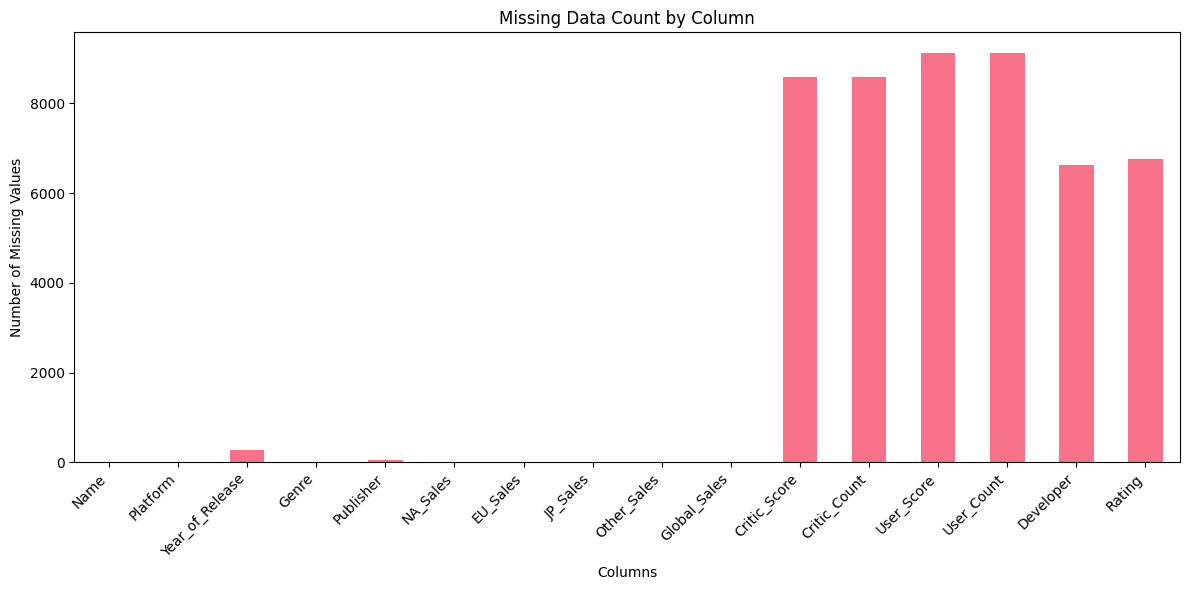

In [11]:
# Your code here . . .
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

missing_summary = pd.DataFrame({
    'Column': missing_data.index,
    'Missing_Count': missing_data.values,
    'Missing_Percentage': missing_percentage.values
})

print("Missing Data Summary:")
print("=" * 50)
print(missing_summary.to_string(index=False))

# Visualize missing data
plt.figure(figsize=(12, 6))
missing_data.plot(kind='bar')
plt.title('Missing Data Count by Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Q2: Show the data type for each column of the dataframe

Data Types Summary:
Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object

Detailed Data Types Summary:
         Column Data_Type  Non_Null_Count  Null_Count
           Name    object           16717           2
       Platform    object           16719           0
Year_of_Release   float64           16450         269
          Genre    object           16717           2
      Publisher    object           16665          54
       NA_Sales   float64           16719           0
       EU_Sales   float64           16719           0
       JP_Sales   float64           16719           0
    Other_Sales   

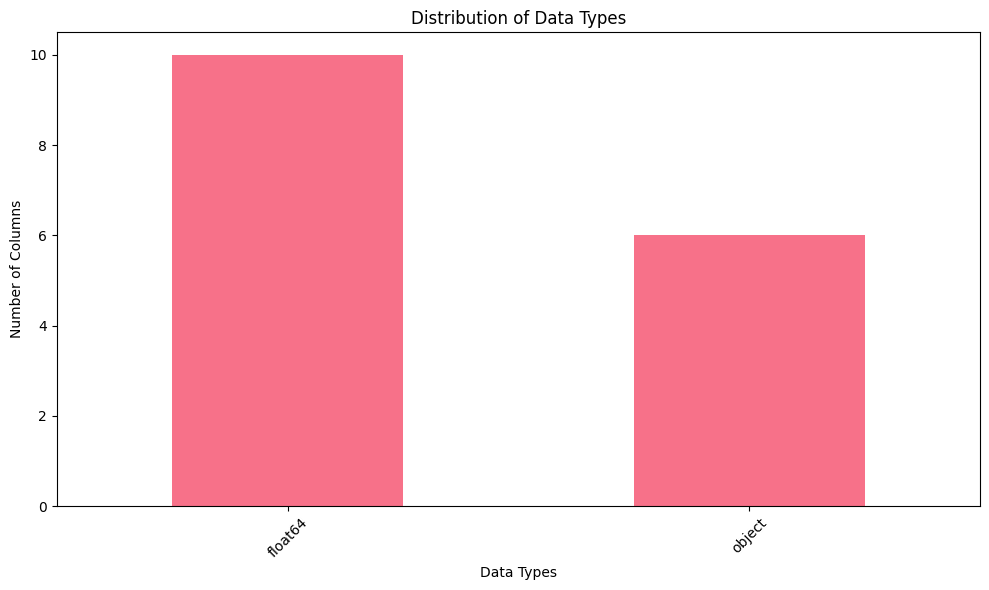

In [12]:
# Your code here . . .
print("Data Types Summary:")
print("=" * 50)
print(df.dtypes)

# Create a summary of data types
data_types_summary = pd.DataFrame({
    'Column': df.columns,
    'Data_Type': df.dtypes.values,
    'Non_Null_Count': df.count().values,
    'Null_Count': df.isnull().sum().values
})

print("\nDetailed Data Types Summary:")
print("=" * 50)
print(data_types_summary.to_string(index=False))

# Visualize data types distribution
plt.figure(figsize=(10, 6))
data_type_counts = df.dtypes.value_counts()
data_type_counts.plot(kind='bar')
plt.title('Distribution of Data Types')
plt.xlabel('Data Types')
plt.ylabel('Number of Columns')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Q3: Create a pair plot to show pairwise relationship in this dataset.
Draw the pairwise polynomial regression lines in a different color than the data points. Use a light color for the data points to deemphasizing the points to make the regression line stand out. Include a meaningful title to the plot.

Numerical columns available: ['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']
Selected columns for pair plot: ['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score', 'User_Score', 'Critic_Count', 'User_Count', 'Year_of_Release']


<Figure size 1500x1200 with 0 Axes>

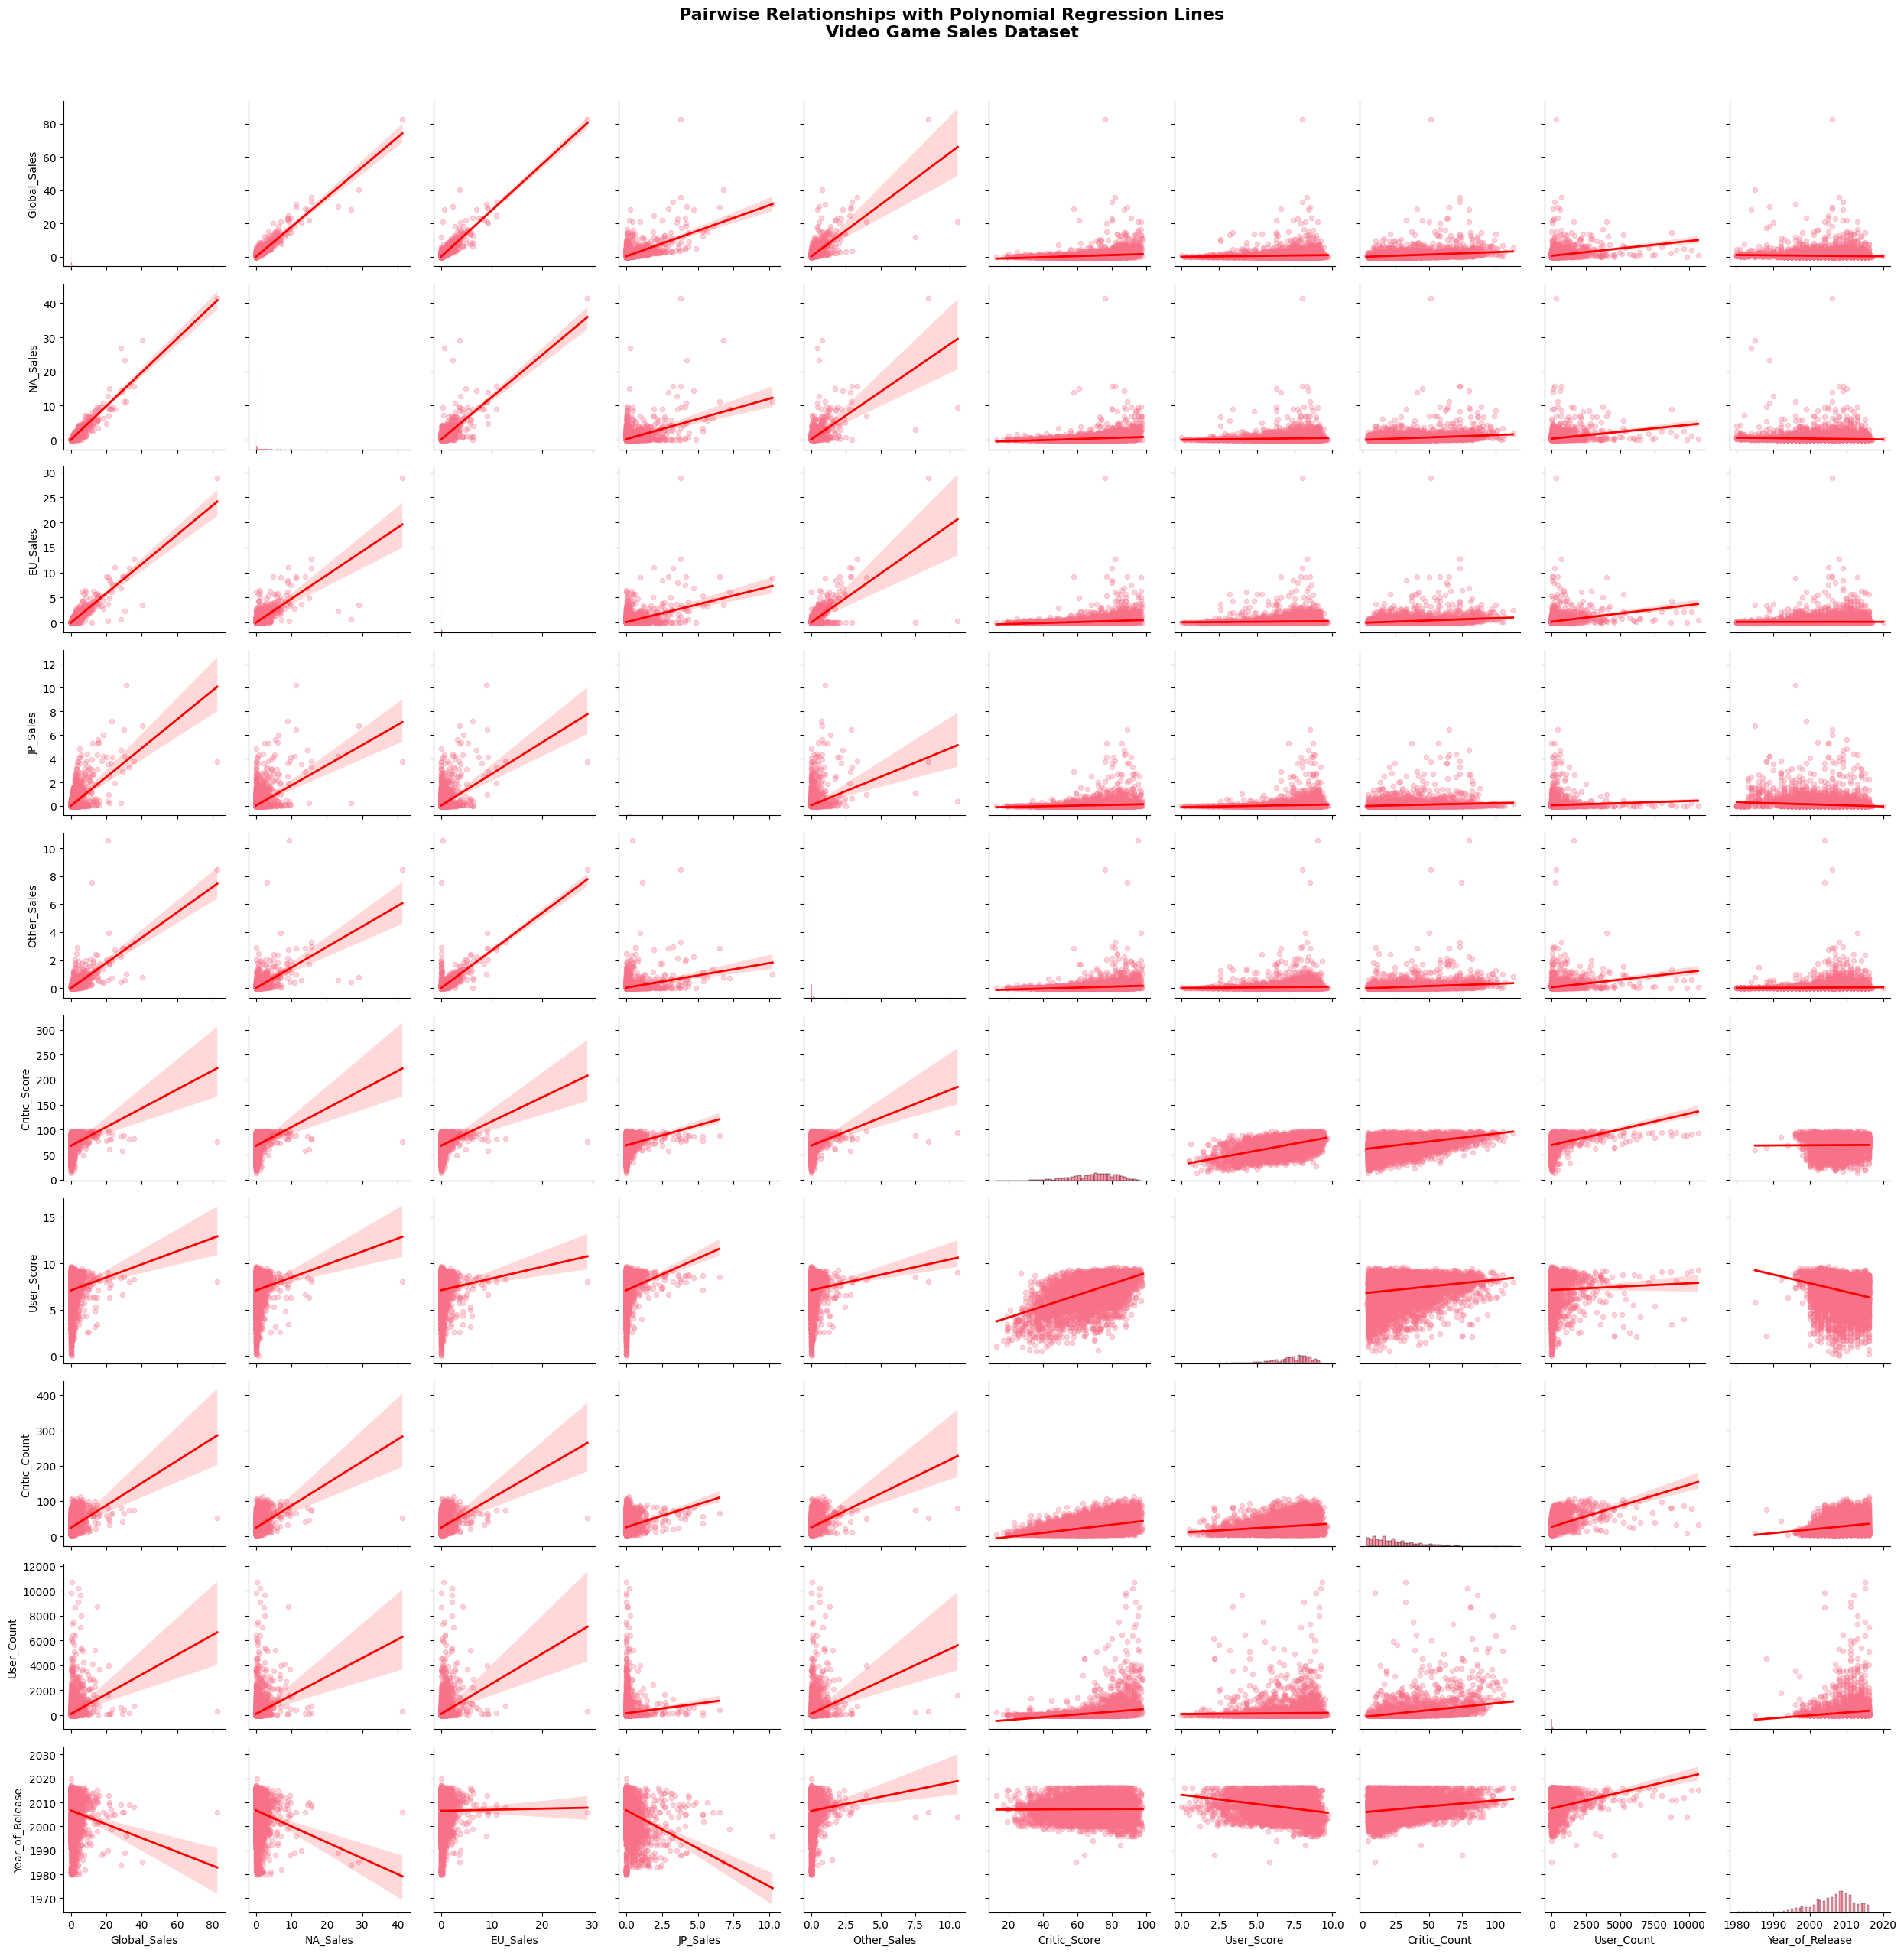

In [13]:
# Q3: Enhanced Pair Plot with Polynomial Regression Lines
# Select numerical columns for pair plot
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numerical columns available:", numerical_cols)

# Select a subset of numerical columns for pair plot (to avoid overcrowding)
# Common video game sales columns
selected_cols = []
for col in ['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
            'Critic_Score', 'User_Score', 'Critic_Count', 'User_Count', 'Year_of_Release']:
    if col in df.columns:
        selected_cols.append(col)

# If we don't have the expected columns, use the first 5 numerical columns
if len(selected_cols) < 3:
    selected_cols = numerical_cols[:5]

print(f"Selected columns for pair plot: {selected_cols}")

# Create pair plot with polynomial regression
plt.figure(figsize=(15, 12))
g = sns.pairplot(df[selected_cols],
                  kind='reg',
                  plot_kws={'scatter_kws': {'alpha': 0.3, 's': 20},  # Light color for points
                           'line_kws': {'color': 'red', 'linewidth': 2}}  # Red regression lines
                 )

g.fig.suptitle('Pairwise Relationships with Polynomial Regression Lines\nVideo Game Sales Dataset',
                y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()



### Q4: Plot a regression line and confidence interval
Select two of the features from your dataset and create a lmplot that shows the linear regression between them. Filter your data as you see fit. Include a meaningful title for the plot.

Using features: Critic_Score (x-axis) and Global_Sales (y-axis)
Data points for regression: 8137


<Figure size 1000x800 with 0 Axes>

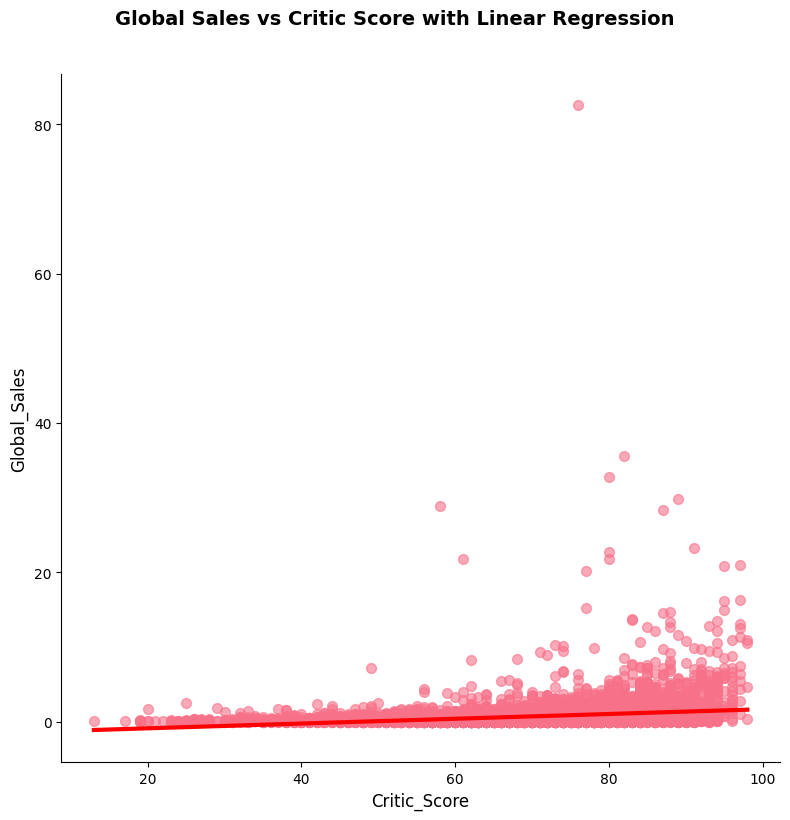


Correlation coefficient between Critic_Score and Global_Sales: 0.245


In [14]:
# Q4: Enhanced Linear Regression with Confidence Interval
if 'Global_Sales' in df.columns and 'Critic_Score' in df.columns:
    x_col, y_col = 'Critic_Score', 'Global_Sales'
    title = 'Global Sales vs Critic Score with Linear Regression'
elif 'Global_Sales' in df.columns and 'User_Score' in df.columns:
    x_col, y_col = 'User_Score', 'Global_Sales'
    title = 'Global Sales vs User Score with Linear Regression'
else:
    # Use first two numerical columns
    x_col, y_col = numerical_cols[0], numerical_cols[1]
    title = f'{y_col} vs {x_col} with Linear Regression'

print(f"Using features: {x_col} (x-axis) and {y_col} (y-axis)")

# Filter out missing values for the selected features
regression_df = df[[x_col, y_col]].dropna()
print(f"Data points for regression: {len(regression_df)}")

# Create lmplot with confidence interval
plt.figure(figsize=(10, 8))
g = sns.lmplot(data=regression_df,
                x=x_col,
                y=y_col,
                height=8,
                scatter_kws={'alpha': 0.6, 's': 50},
                line_kws={'color': 'red', 'linewidth': 3})

g.fig.suptitle(title, y=1.02, fontsize=14, fontweight='bold')
plt.xlabel(x_col, fontsize=12)
plt.ylabel(y_col, fontsize=12)
plt.tight_layout()
plt.show()

# Calculate correlation coefficient
correlation = regression_df[x_col].corr(regression_df[y_col])
print(f"\nCorrelation coefficient between {x_col} and {y_col}: {correlation:.3f}")

### Q5. Create a relplot that shows multiple features in a single plot.
Select two features from your dataset and plot a scatter plot. Select two additional features you want to highlight in your data points using `hue` and `size`. Include a meaningful title to the plot.

Plot features: x=Critic_Score, y=Global_Sales, hue=Platform, size=Year_of_Release
Data points for relplot: 7983


<Figure size 1200x800 with 0 Axes>

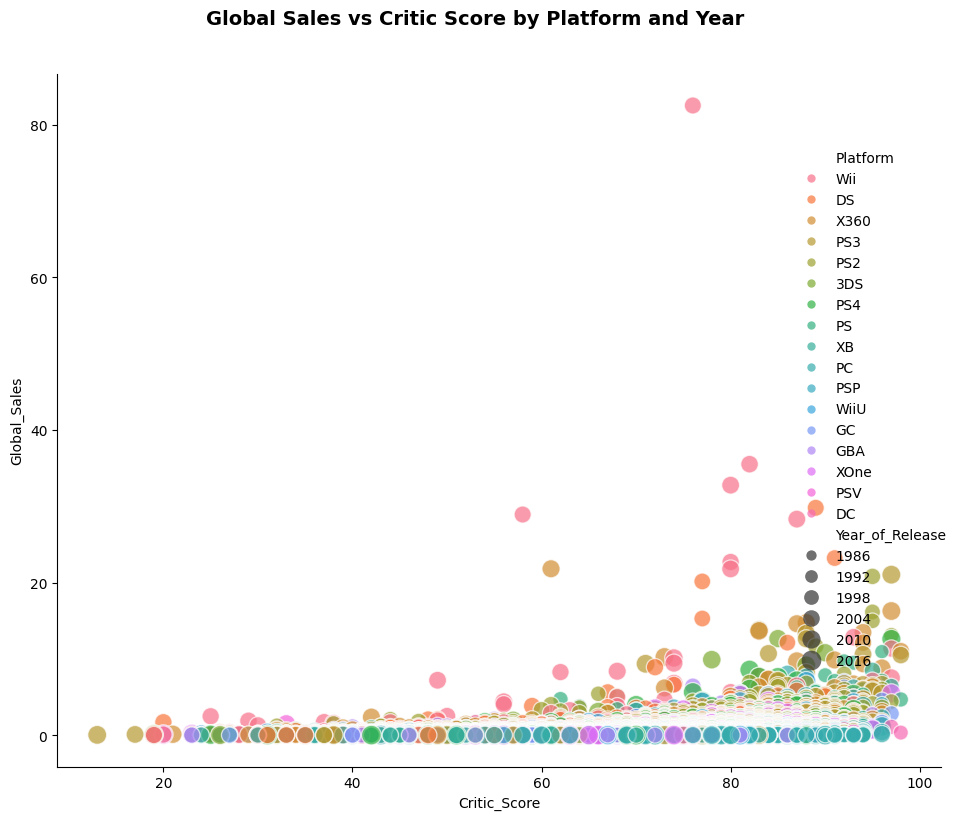

In [15]:
# Q5: Multi-Feature Relplot with Hue and Size (Clean Version)
# Select features for the plot
if all(col in df.columns for col in ['Global_Sales', 'Critic_Score', 'Platform', 'Year_of_Release']):
    x_feature, y_feature = 'Critic_Score', 'Global_Sales'
    hue_feature, size_feature = 'Platform', 'Year_of_Release'
    title = 'Global Sales vs Critic Score by Platform and Year'
elif all(col in df.columns for col in ['NA_Sales', 'EU_Sales', 'Platform', 'Critic_Score']):
    x_feature, y_feature = 'Critic_Score', 'NA_Sales'
    hue_feature, size_feature = 'Platform', 'EU_Sales'
    title = 'NA Sales vs Critic Score by Platform and EU Sales'
else:
    # Use available columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    if len(numerical_cols) >= 4 and len(categorical_cols) >= 1:
        x_feature, y_feature = numerical_cols[0], numerical_cols[1]
        hue_feature = categorical_cols[0]
        size_feature = numerical_cols[2] if len(numerical_cols) > 2 else numerical_cols[1]
        title = f'{y_feature} vs {x_feature} by {hue_feature} and {size_feature}'
    else:
        print("Insufficient columns for relplot. Using basic scatter plot.")
        x_feature, y_feature = numerical_cols[0], numerical_cols[1]
        hue_feature, size_feature = None, None
        title = f'{y_feature} vs {x_feature}'

print(f"Plot features: x={x_feature}, y={y_feature}, hue={hue_feature}, size={size_feature}")

# Filter data for the plot
plot_cols = [x_feature, y_feature]
if hue_feature:
    plot_cols.append(hue_feature)
if size_feature and size_feature != y_feature:
    plot_cols.append(size_feature)

relplot_df = df[plot_cols].dropna()
print(f"Data points for relplot: {len(relplot_df)}")

# Create relplot
plt.figure(figsize=(12, 8))
if hue_feature and size_feature:
    g = sns.relplot(data=relplot_df,
                    x=x_feature,
                    y=y_feature,
                    hue=hue_feature,
                    size=size_feature,
                    sizes=(50, 200),
                    alpha=0.7,
                    height=8)
elif hue_feature:
    g = sns.relplot(data=relplot_df,
                    x=x_feature,
                    y=y_feature,
                    hue=hue_feature,
                    alpha=0.7,
                    height=8)
else:
    g = sns.relplot(data=relplot_df,
                    x=x_feature,
                    y=y_feature,
                    alpha=0.7,
                    height=8)

g.fig.suptitle(title, y=1.02, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()



### Q6: Create a plot with small multiples plots
Select two features from your dataset and show the relationship between the features with an additional feature as the single category. Organize the multiple plots to have 3 plots per row. Set the `height` of the plot to 5 and the size the of data point to 20. Include a meaningful title in the plot.

Small multiples features: x=Critic_Score, y=Global_Sales, category=Platform
Top categories: ['PS2', 'DS', 'PS3', 'Wii', 'X360', 'PSP', 'PS', 'PC', 'XB']
Data points for small multiples: 6438


<Figure size 1500x1200 with 0 Axes>

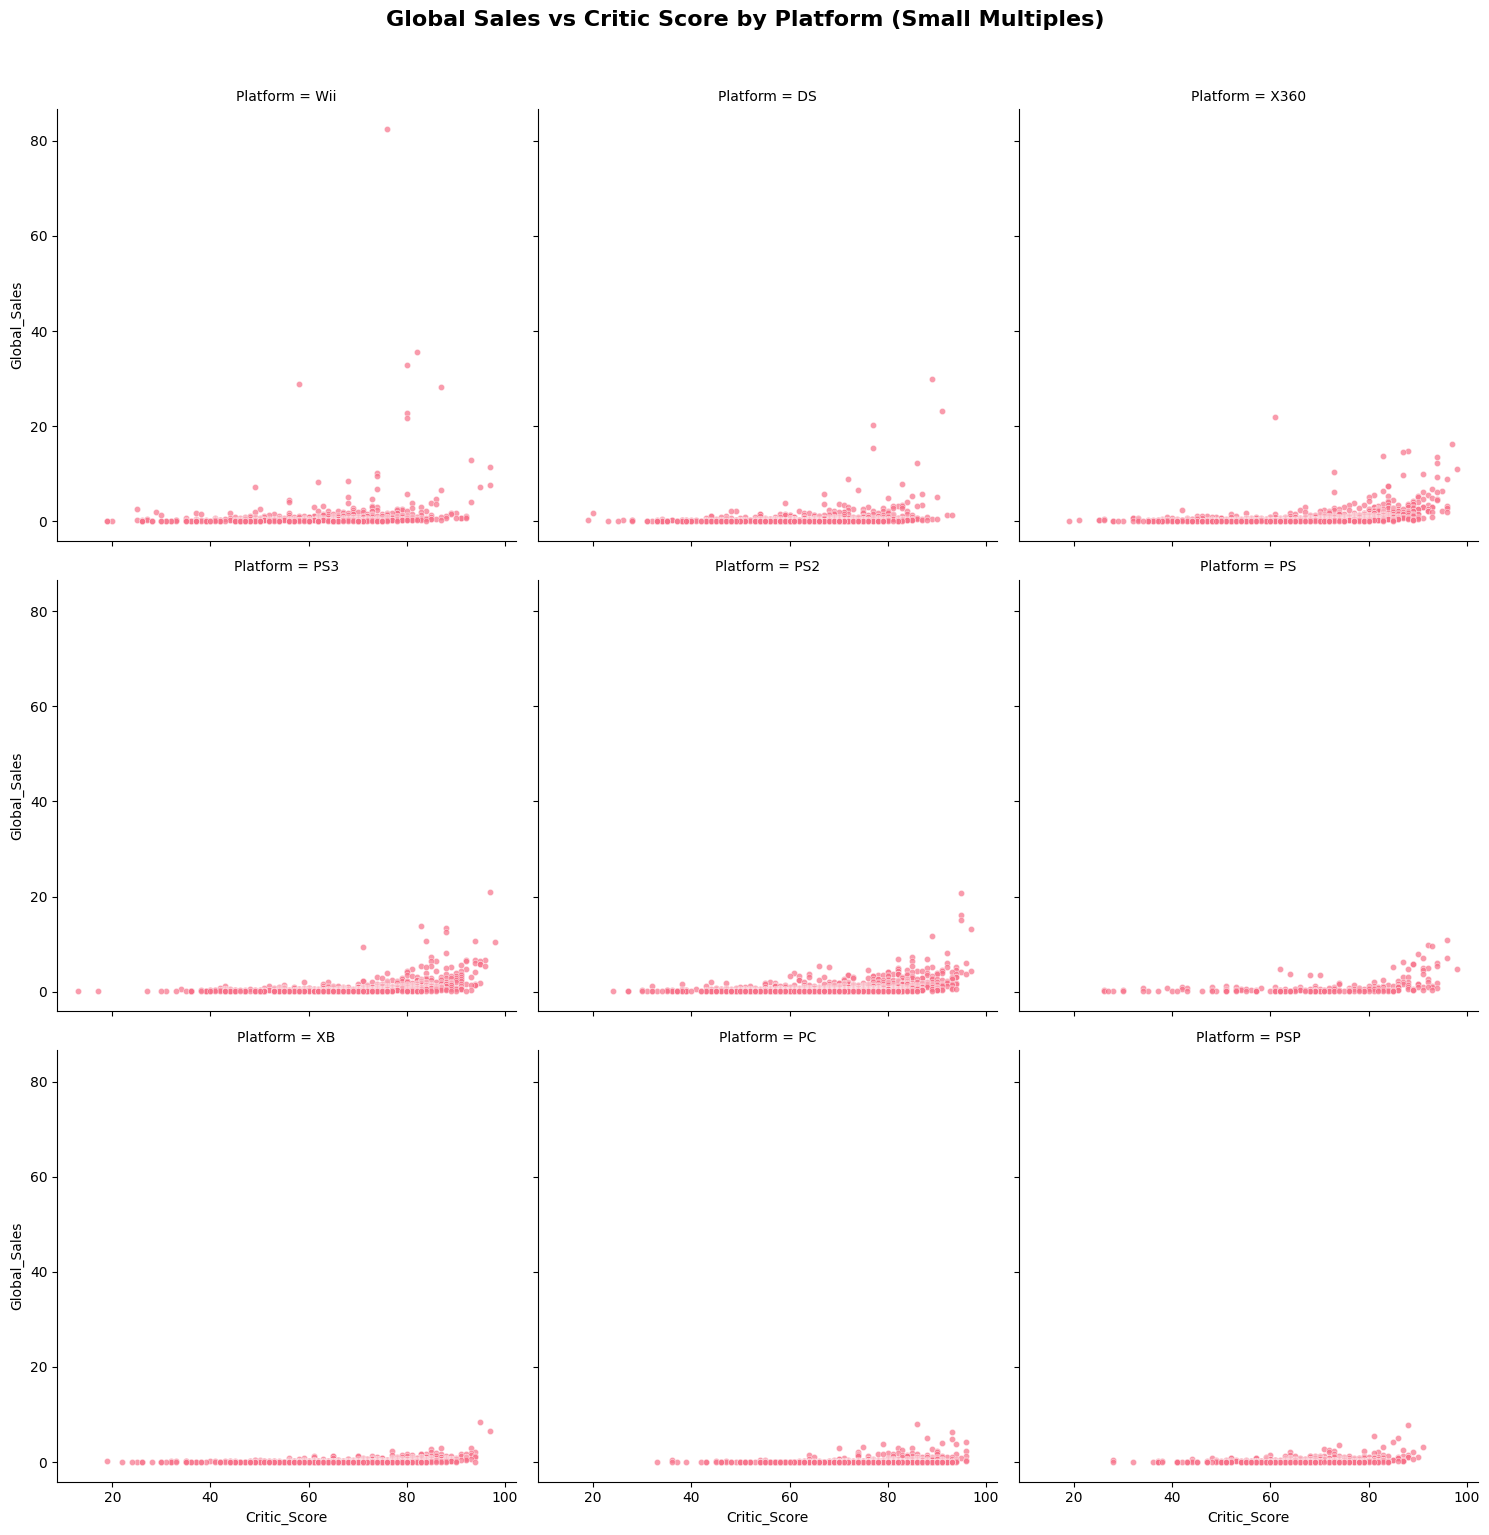

In [16]:
# Q6: Enhanced Small Multiples Plot
# Select features for small multiples
if all(col in df.columns for col in ['Global_Sales', 'Critic_Score', 'Platform']):
    x_feature, y_feature = 'Critic_Score', 'Global_Sales'
    category_feature = 'Platform'
    title = 'Global Sales vs Critic Score by Platform (Small Multiples)'
elif all(col in df.columns for col in ['NA_Sales', 'EU_Sales', 'Genre']):
    x_feature, y_feature = 'NA_Sales', 'EU_Sales'
    category_feature = 'Genre'
    title = 'NA Sales vs EU Sales by Genre (Small Multiples)'
else:
    # Use available columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    if len(numerical_cols) >= 2 and len(categorical_cols) >= 1:
        x_feature, y_feature = numerical_cols[0], numerical_cols[1]
        category_feature = categorical_cols[0]
        title = f'{y_feature} vs {x_feature} by {category_feature} (Small Multiples)'
    else:
        print("Insufficient columns for small multiples plot.")
        x_feature, y_feature = numerical_cols[0], numerical_cols[1]
        category_feature = None
        title = f'{y_feature} vs {x_feature}'

print(f"Small multiples features: x={x_feature}, y={y_feature}, category={category_feature}")

# Filter data and get top categories (to avoid too many subplots)
if category_feature:
    # Get top categories by count
    top_categories = df[category_feature].value_counts().head(9).index.tolist()  # 9 for 3x3 grid
    small_multiples_df = df[df[category_feature].isin(top_categories)][[x_feature, y_feature, category_feature]].dropna()

    print(f"Top categories: {top_categories}")
    print(f"Data points for small multiples: {len(small_multiples_df)}")

    # Create small multiples plot
    plt.figure(figsize=(15, 12))
    g = sns.relplot(data=small_multiples_df,
                    x=x_feature,
                    y=y_feature,
                    col=category_feature,
                    col_wrap=3,  # 3 plots per row
                    height=5,     # Height of each plot
                    s=20,        # Size of data points
                    alpha=0.7)

    g.fig.suptitle(title, y=1.02, fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("No categorical feature available for small multiples.")
    # Create a simple scatter plot instead
    plt.figure(figsize=(10, 8))
    plt.scatter(df[x_feature], df[y_feature], alpha=0.6, s=20)
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.title(title)
    plt.tight_layout()
    plt.show()

